In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
import numpy as np

In [3]:
sell_prices_df = pd.read_csv("sell_prices_afcs2024.csv")

In [4]:
sell_prices_df

,store_id,item_id,wm_yr_wk,sell_price
0,TX_3,FOODS_3_001,11101,2.28
1,TX_3,FOODS_3_001,11102,2.28
2,TX_3,FOODS_3_001,11103,2.28
3,TX_3,FOODS_3_001,11104,2.28
4,TX_3,FOODS_3_001,11105,2.28
...,...,...,...,...
185255,TX_3,FOODS_3_827,11617,1.00
185256,TX_3,FOODS_3_827,11618,1.00
185257,TX_3,FOODS_3_827,11619,1.00
185258,TX_3,FOODS_3_827,11620,1.00


In [5]:
df = pd.read_csv('sales_train_validation_afcs2024.csv')
df

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,...,0,0,0,0,2,0,0,5,2,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
3,FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,...,0,4,2,1,1,0,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,FOODS_3_823_TX_3_validation,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,2,0,2
819,FOODS_3_824_TX_3_validation,0,1,0,1,0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
820,FOODS_3_825_TX_3_validation,0,0,0,2,1,1,0,0,1,...,1,1,1,3,1,0,0,4,2,0
821,FOODS_3_826_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,2,1,1,5,3,1,2,1,2


In [19]:
time_series_products = df.drop('id', axis=1)

In [43]:
def autocorr(series, lag=1):
    return series.autocorr(lag=lag)

In [44]:
row_variance = time_series_products.var(axis=1)
row_std_dv = time_series_products.std(axis=1)

range_row = time_series_products.max(axis =1) - time_series_products.min(axis=1)
autocor = time_series_products.apply(autocorr, axis=1)

<Axes: title={'center': 'variance per product'}, xlabel='product', ylabel='variance value'>

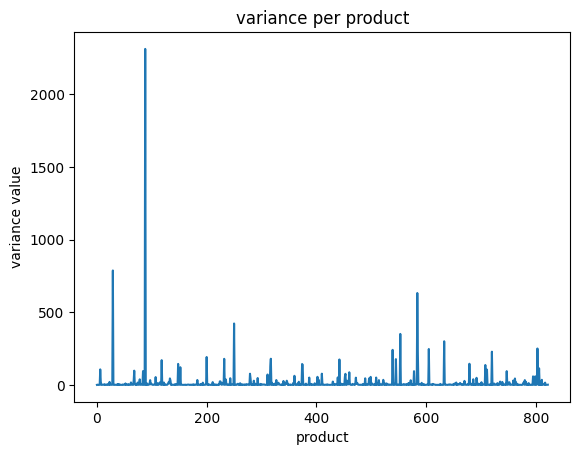

In [52]:
row_variance.plot(xlabel = "product", ylabel = "variance value", title = "variance per product")

<Axes: title={'center': 'log variance value per product'}, xlabel='product', ylabel='log variance value'>

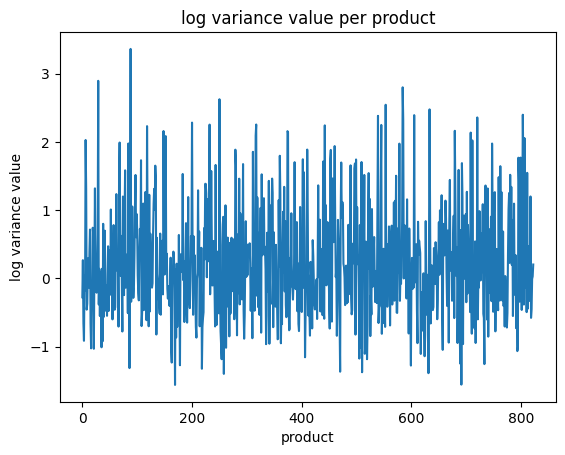

In [53]:
np.log10(row_variance).plot(xlabel = "product", ylabel = "log variance value", title = "log variance value per product")

<Axes: title={'center': 'standard deviation per product'}, xlabel='product', ylabel='standard deviation value'>

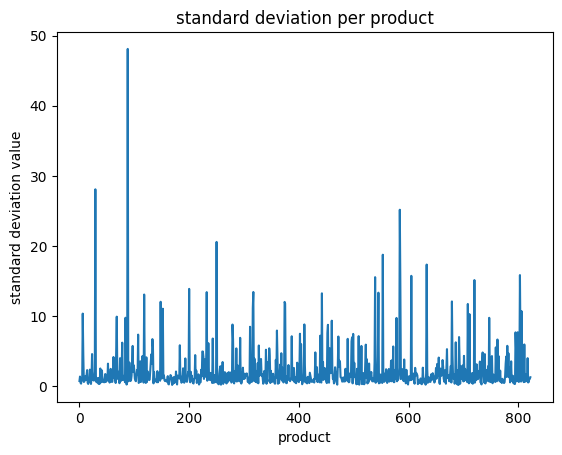

In [54]:
row_std_dv.plot(xlabel = "product", ylabel = "standard deviation value", title = "standard deviation per product")

<Axes: title={'center': 'max min difference per product'}, xlabel='product', ylabel='maximum minimum range value'>

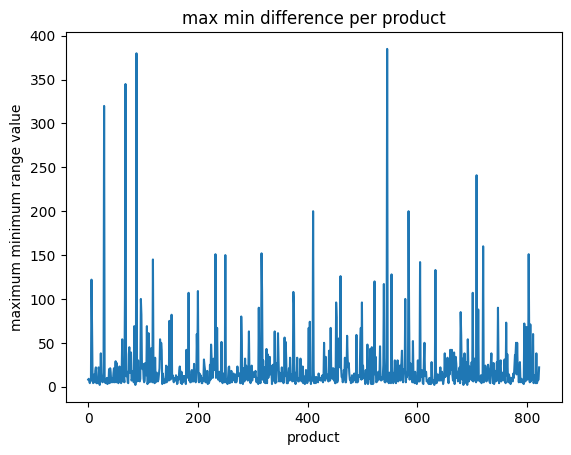

In [56]:
range_row.plot(xlabel = "product", ylabel = "maximum minimum range value", title = "max min difference per product")

<Axes: title={'center': 'Autocorrelation per product with lag equal to 1'}, xlabel='product', ylabel='ACF value'>

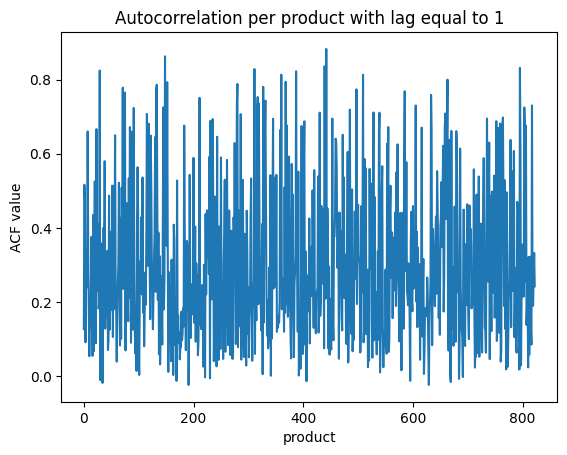

In [58]:
autocor.plot(xlabel = "product", ylabel = "ACF value", title = "Autocorrelation per product with lag equal to 1")

In [25]:
transposed_df = df.transpose()
transposed_df

,0,1,2,3,4,5,6,7,8,9,...,813,814,815,816,817,818,819,820,821,822
id,FOODS_3_001_TX_3_validation,FOODS_3_002_TX_3_validation,FOODS_3_003_TX_3_validation,FOODS_3_004_TX_3_validation,FOODS_3_005_TX_3_validation,FOODS_3_006_TX_3_validation,FOODS_3_007_TX_3_validation,FOODS_3_008_TX_3_validation,FOODS_3_009_TX_3_validation,FOODS_3_010_TX_3_validation,...,FOODS_3_818_TX_3_validation,FOODS_3_819_TX_3_validation,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation
d_1,0,0,0,0,0,0,27,0,0,0,...,0,9,3,0,7,0,0,0,0,0
d_2,2,0,0,0,1,0,27,0,0,0,...,0,0,2,0,5,0,1,0,0,0
d_3,1,0,0,0,1,0,8,0,0,0,...,0,3,1,0,5,0,0,0,0,0
d_4,3,0,0,0,0,0,0,0,0,0,...,0,0,3,0,3,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,0,0,0,0,0,0,0,0,1,0,...,3,0,1,0,0,0,0,0,3,0
d_1910,0,0,0,0,1,1,0,0,0,0,...,0,1,2,2,1,0,0,0,1,1
d_1911,5,0,1,0,0,1,0,0,0,0,...,1,0,3,2,0,2,0,4,2,0
d_1912,2,0,0,0,4,1,0,0,0,0,...,1,3,1,0,1,0,0,2,1,0


In [31]:
# Melt the dataset to a long format
data_long = sell_prices_df.melt(id_vars=['store_id', 'item_id'], 
                      var_name='day', 
                      value_name='sales')

# Convert `day` column to numerical format
data_long['day'] = data_long['day'].str.extract('(\d+)').astype(int)

# Sort by store, department, item, and day
data_long = data_long.sort_values(['store_id', 'dept_id', 'item_id','id','cat_id','state_id', 'day'])

,store_id,item_id,day,sales
0,TX_3,FOODS_3_001,wm_yr_wk,11101.0
1,TX_3,FOODS_3_001,wm_yr_wk,11102.0
2,TX_3,FOODS_3_001,wm_yr_wk,11103.0
3,TX_3,FOODS_3_001,wm_yr_wk,11104.0
4,TX_3,FOODS_3_001,wm_yr_wk,11105.0
...,...,...,...,...
370515,TX_3,FOODS_3_827,sell_price,1.0
370516,TX_3,FOODS_3_827,sell_price,1.0
370517,TX_3,FOODS_3_827,sell_price,1.0
370518,TX_3,FOODS_3_827,sell_price,1.0
